In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = "MW.txt"
df = {"id":[], "event":[], "device":[], "channel":[], "code":[], "size":[], "data":[]}
for line in open(filename):
  id, event, device, channel, code, size, data = line.split("\t")
  data = ([int(dat.strip()) for dat in data.split(",")])
  df["id"].append(id)
  df["event"].append(event)
  df["device"].append(device)
  df["channel"].append(channel)
  df["size"].append(size)
  df["code"].append(code)
  df["data"].append(data)
df = pd.DataFrame(df)
df.head()

,id,event,device,channel,code,size,data
0,0,0,MW,FP1,0,1017,"[38, 48, 51, 44, 48, 56, 56, 41, 20, -3, -9, -..."
1,1,1,MW,FP1,1,889,"[83, 74, 65, 65, 66, 55, 43, 25, 18, 20, 26, 3..."
2,2,2,MW,FP1,4,1017,"[19, 10, -2, -9, -5, 3, 8, 7, 8, 2, -10, -21, ..."
3,3,3,MW,FP1,1,1017,"[17, 29, 36, 26, 21, 17, 17, 13, 17, 21, 25, 2..."
4,4,4,MW,FP1,8,952,"[77, 74, 69, 70, 76, 75, 76, 75, 67, 66, 76, 9..."


In [5]:
#sanity checks
print(df["channel"].value_counts())
print(df["code"].value_counts())
print(df["size"].value_counts())
print(df["device"].value_counts())

channel
FP1    67635
Name: count, dtype: int64
code
-1    12701
5      5568
7      5552
8      5545
0      5531
2      5517
1      5498
6      5476
9      5450
3      5416
4      5381
Name: count, dtype: int64
size
952     14403
953     13610
1024    12701
1017     8825
1015     8617
889      6445
951      1068
1016      820
1014      597
888       530
825         7
826         5
763         2
504         1
441         1
569         1
890         1
700         1
Name: count, dtype: int64
device
MW    67635
Name: count, dtype: int64


In [9]:
from scipy.interpolate import interp1d
srate = 512.0 #MW device
leng = np.median([len(data) for data in df["data"]])
print(leng)

953.0


In [20]:
from math import nan
for j, data in enumerate(df["data"]):
  x = np.arange(0, len(data))/srate
  for i, dat in enumerate(data):
    if(dat == nan):
      data.remove(dat)
      x.remove(x[i])
  fun = interp1d(x, data, fill_value="extrapolate")
  data = fun(np.arange(0, leng)/srate)
  df.loc[j, "data"] = data
  df.loc[j, "size"] = len(data)

print(df.head())

  id event device channel code size  \
0  0     0     MW     FP1    0  953   
1  1     1     MW     FP1    1  953   
2  2     2     MW     FP1    4  953   
3  3     3     MW     FP1    1  953   
4  4     4     MW     FP1    8  953   

                                                data  
0  [38.0, 48.0, 51.0, 44.0, 48.0, 56.0, 56.0, 41....  
1  [83.0, 74.0, 65.0, 65.0, 66.0, 55.0, 43.0, 25....  
2  [19.0, 10.0, -2.0, -9.0, -5.0, 3.0, 8.0, 7.0, ...  
3  [17.0, 29.0, 36.0, 26.0, 21.0, 17.0, 17.0, 13....  
4  [77.0, 74.0, 69.0, 70.0, 76.0, 75.0, 76.0, 75....  


In [21]:
print(len(df["data"][0]))

953


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i, data in enumerate(df["data"]):
  data = scaler.fit_transform(data.reshape(-1, 1)).flatten()
  df.loc[i, "data"] = data
df.head()

,id,event,device,channel,code,size,data
0,0,0,MW,FP1,0,953,"[0.5429553264604811, 0.5773195876288659, 0.587..."
1,1,1,MW,FP1,1,953,"[0.2515952597994531, 0.2433910665451231, 0.235..."
2,2,2,MW,FP1,4,953,"[0.4609053497942387, 0.4238683127572017, 0.374..."
3,3,3,MW,FP1,1,953,"[0.29296875, 0.33984375, 0.3671875, 0.328125, ..."
4,4,4,MW,FP1,8,953,"[0.6347826086956522, 0.6217391304347826, 0.6, ..."


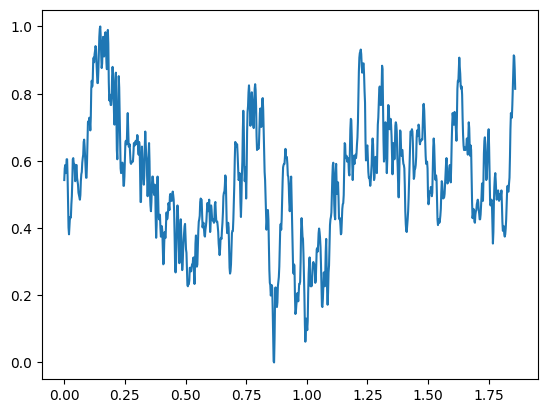

In [27]:
x = np.arange(0, leng)/srate
plt.plot(x, df["data"][0])
plt.show()

In [ ]:
df.to_csv('MW.csv', index=False)